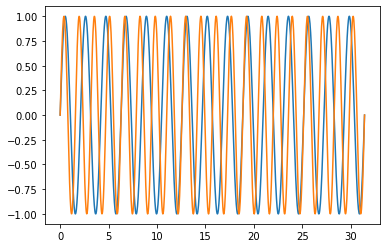

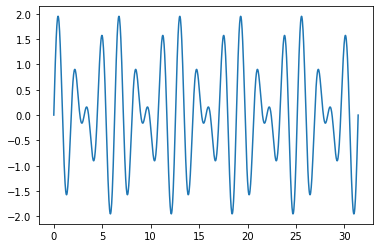

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand
from numpy import linalg as LA
#for my project I will investigate atomic spectra and simulate what the combined function that will be produced


#first lets start with the simple case of just two oscillations combined
#generate to linespace of x
x1 = np.linspace(0,10*np.pi,1000)
x2 = np.linspace(0,10*np.pi,1000)


#make the model of the oscillations
def model(x,w,A,p):
    return A*np.sin(w*x+p)


#use the model to generate the y values 
y1 = model(x1,3,1,0)
y2 = model(x2,4,1,0)


#plot the plots individually
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.show()

#plot them combined
plt.plot(x1, y1 + y2)
plt.show()



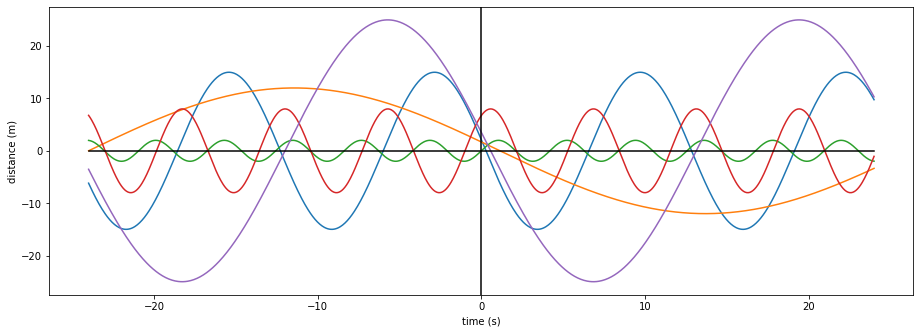

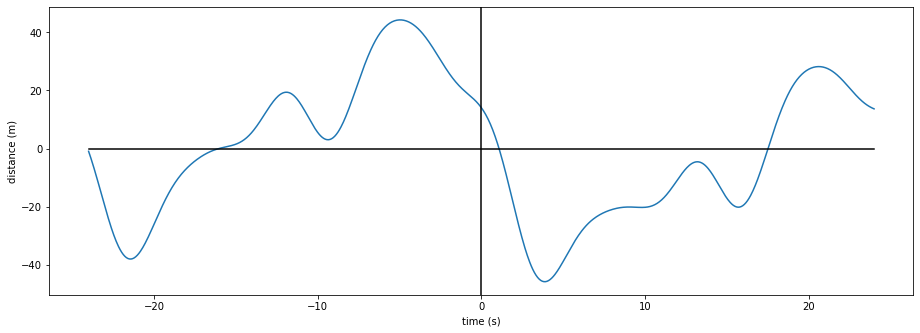

In [3]:
#now to make a general algorithm

#first we make a complex data type that contains three lists one for the amplitude, one for wavelength, and one for phase shift
class eom:
    def __init__(equation):
        equation.A = []
        equation.W = []
        equation.P = []
    
    #function that adds a line to the complex data type 
    def add_line(equation,a,w,p):
        equation.A.append(a)
        equation.W.append(w)
        equation.P.append(p)

#new model function it's the same as before
#you may be concerned that we can't model cos with this if we desired 
#but since we include a phase shift we can use sin(x + π/2) = cos(x) to plot cos functions
def model_y(x,A,w,p):
    return A*np.sin(w*x+p)


#now write the general algorithm for superposition
#list_equation is the complex data type we defined before
#"constant" is the only other thing that effects the plot it adds a constant to the graph this is usefull for fourier analysis
#the rest are optional arguments to change the graph produced
#"points" changes how many points are made per graph
#"length" changes what value of x the graph goes up to
#"graph_length" stretches or compresses the graph horizontally
#"graph_height" stretches or compresses the graph vertically
#you can see the defaults for these in the function definition they are chosen  based on they have a descent run time on my pc
def combine(list_equation, points = 1000, length = 24, graph_length = 2, graph_height = 1, constant = 0):
    
    #initialize empty lists
    #list_temp1 will be a list of lists
    lst_temp1 = []
    #list_temp2 will be the superposition of all equations
    lst_temp2 = []
    sum = 0
    
    #make a loop that executes as many times as their are equations
    for i in range(len(list_equation.A)):
        #generate a line space based on the "length" and "points" arguments
        x = np.linspace(-length,length,points)
        #append the list created by the model function to lst_temp1 making a list of lists
        lst_temp1.append(model_y(x,list_equation.A[i],list_equation.W[i],list_equation.P[i]))
    
    #now that we have all the data modeled in y we need to superimpose them using a nested for loop
    for i in range(len(lst_temp1[0])):
        sum = 0
        for j in range(len(lst_temp1)):
            #take the ith element of each nested list and sum them and append that to lst_temp2
            sum += lst_temp1[j][i]
        #if there is a non-zero constant add it now    
        lst_temp2.append(sum + constant)
    
    #now we have everything we need
    #set shape of plot
    plt.axes([0, 0.6, graph_length, graph_height])    
    for i in range(len(lst_temp1)):
        #plot the individual functions
        plt.plot(x,lst_temp1[i])
    rnge=[-length,length]
    plt.plot(rnge, [0,0], 'k')
    plt.xlabel("time (s)")
    plt.ylabel("distance (m)")
    plt.axvline(x = 0, ymin = 0, ymax = 1, color = 'black')
    plt.show()
    
    #set shape of second plot
    plt.axes([0, 0.6, graph_length, graph_height])
    #plot the superposition
    plt.plot(x,lst_temp2)
    rnge=[-length,length]
    plt.axvline(x = 0, ymin = 0, ymax = 1, color = 'black')
    plt.plot(rnge, [0,0], 'k')
    plt.xlabel("time (s)")
    plt.ylabel("distance (m)")
    plt.show()
    


    


#initialize a complex data type
p_test = eom()

#generate 8 random lines with certain constraints on their properties
for i in range(5):
    A = rand.randint(0,30)
    w = rand.randint(1,16)/8
    p = rand.randint(0,4)
    p_test.add_line(A,w,p)

#use the combine function to plot the superposition and individual plots
combine(p_test, graph_length = 2)






[656.46711282 486.27193542 434.17137091 410.29194551 397.1220806 ]
[ 3  7  9 18  5]
[ 727.32482702  981.88851647 1099.71513845 1163.71972323 1202.31246915]
[0. 0. 0. 0. 0.]


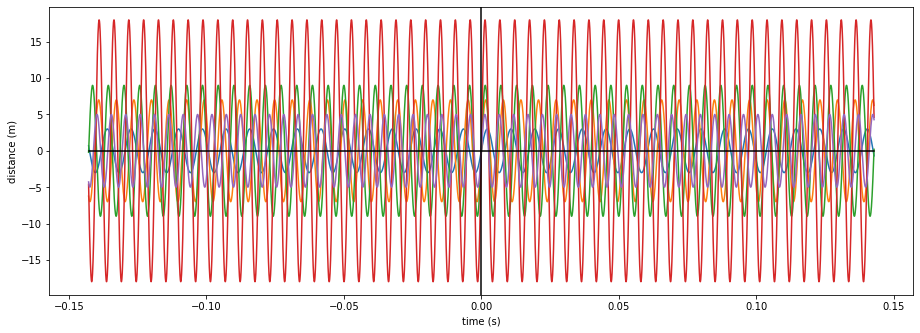

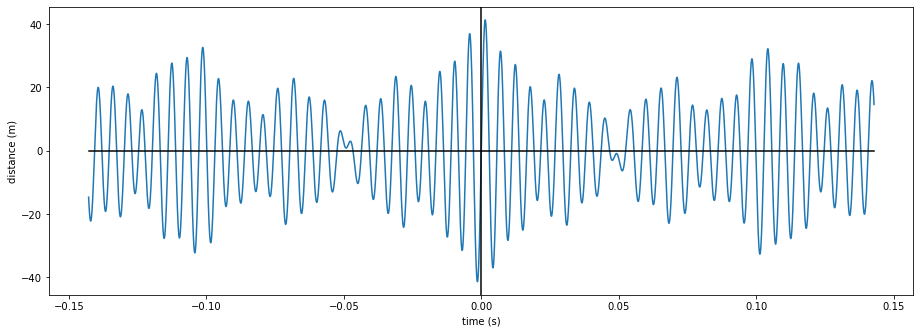

In [157]:
#now lets look at the Hydrogen emmission
#we will need to change it's wavelength to frequency so
#initiliaze an equation type

Hydrogen = eom()

speed_light = 3 * 10**(6)
def wavelength_to_freq(wavelength):
    return speed_light/(2*np.pi*wavelength)



#this is the formula for the wavelength of an emmitted photon
def wavelength_e(R_m,Z,n1,n2):
    return (1/((R_m * Z**2 * (1/n2**2 - 1/n1**2))))*10**9


#we will simulate the balmer series a famous series of hydrogen emmissions where n2 = 2 and n1 = 3 to 7
#so we make two arrays
n1_array = np.arange(3,8,1)
n2_array = np.ones(len(n1_array))*2

#make the wavelengths that are emmitted
wavelength_h = (wavelength_e(1.09678 * 10**7, 1, n1_array, n2_array))
print(wavelength_h)

#amplitude from https://physics.nist.gov/PhysRefData/ASD/lines_form.html searching H, these are relative intensities
amplitude = np.array([3, 7, 9, 18, 5])

#change these wavelengths to angular frequencies using wavelength_to_freq function 
#you may notice the multiple of 5; it is just to compress the graph so we can see more
Hydrogen.W = wavelength_to_freq(wavelength_h)

#for now assume that they all have the same amplitude
Hydrogen.A = amplitude

#phase shift will be zero
Hydrogen.P = np.ones(len(wavelength_h))*0

print(Hydrogen.A)
print(Hydrogen.W)
print(Hydrogen.P)

#superimpose
combine(Hydrogen, length = 1/7, points = 6000, graph_length = 2)
plt.show()



#we can do this for any emmission easily now

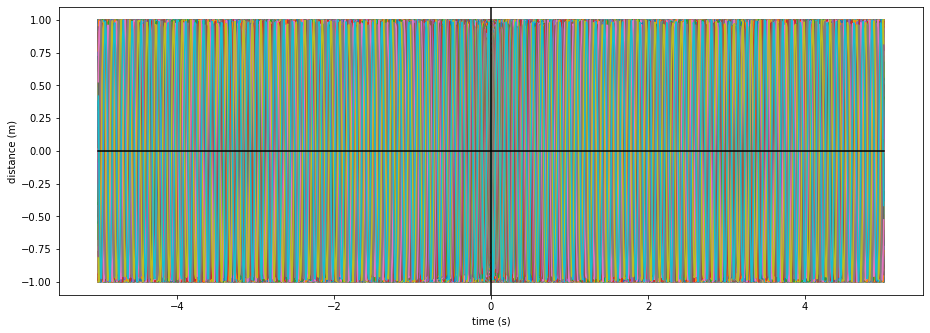

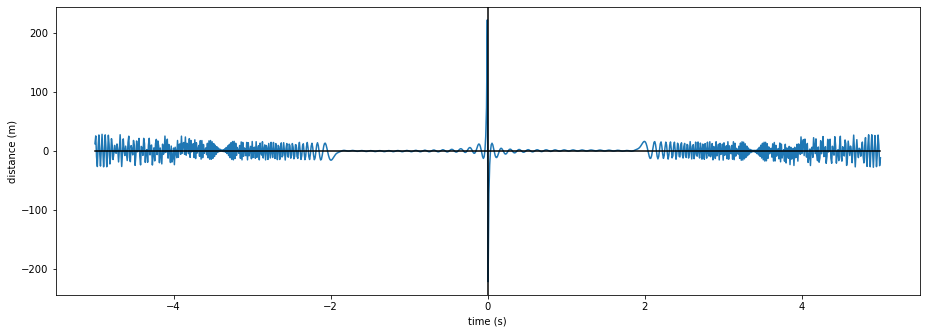

In [158]:


#now lets look at what the visible spectrum might appear as if we take an emmission at one nano meter across the visible spectrum
pa = eom()

for i in range(380,700,1):
    pa.add_line(1,wavelength_to_freq(i),0)

combine(pa, length = 5, points = 1000)
plt.show()

As you can see they initially all start in phase resulting in a large amplitude but as they slowly get more and more out of phase their  sum gets closer and closer to zero as they become randomally distributed. Then at about x = 2 it reaches some sort of steady state. This isn't a perfect representation of the visual spectrum of the sun since it has absorbtion lines and the lines amplitudes would not be equal. If I could find a csv with this data it would be easy to graph it however I couldn't any data just pictures. It's fascinating that with a diffraction grating this superposition can be undone so easily.

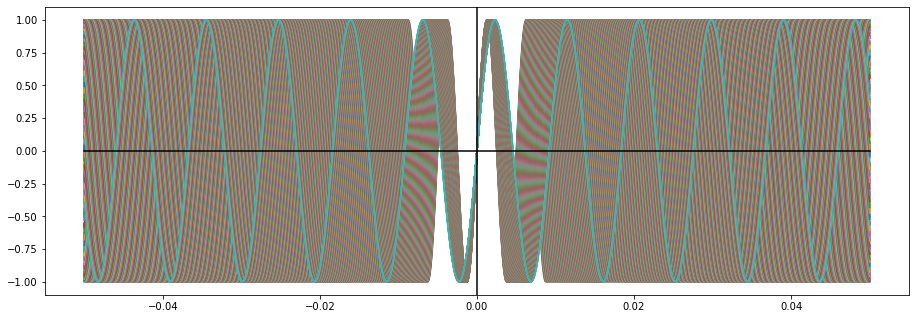

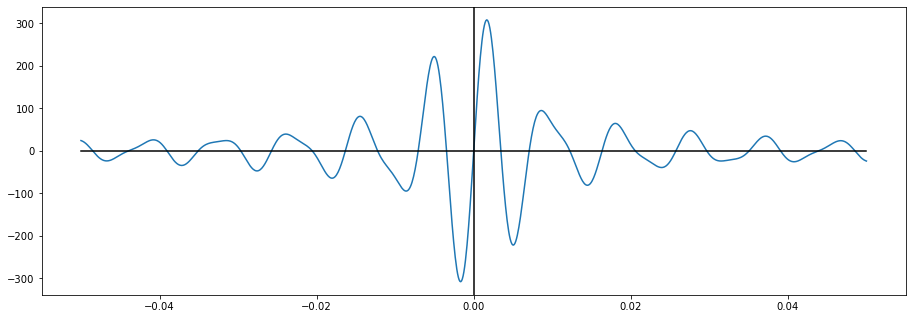

In [31]:
#here is the start
combine(pa, length = 0.05, points = 1000)

In [5]:
#okay so now we can super impose graphs easily
#there are prewritten programs that compute the eigen values and eigen vectors of a matrix which we know can represent  
#equations of motion such as the following 
#here's the page on this function https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html
#but the important part is that w is a list of eigen values and a v is a list of normalized eigen vectors where each egien vector is a list
w,v = LA.eig(np.array([[1,2],[1,3]]))
print(w)

#for whatever reasons it returns the vectors as columns so they aren't grouped together so write a function to fix this
#this isn't important all it does is change something like [[a,b],[c,d]] (think of as a square matrix) then change cols to rows giving [[a,c],[b,d]]
def fix_v(v):
    lst = []
    for i in range(len(v)):
        lst.append([])

    for i in range(len(v)):
        for j in range(len(v[i])):
            lst[i].append(v[j][i])
    return lst

[0.26794919 3.73205081]


eigenvalues = [ 6. 41.]
eigenvectors = [[-0.8320502943378436, -0.5547001962252293], [0.40613846605344767, -0.9138115486202572]]



A[0] = 0.429
w[0] = 6.000

A[1] = 0.571
w[1] = 41.000

mass 1


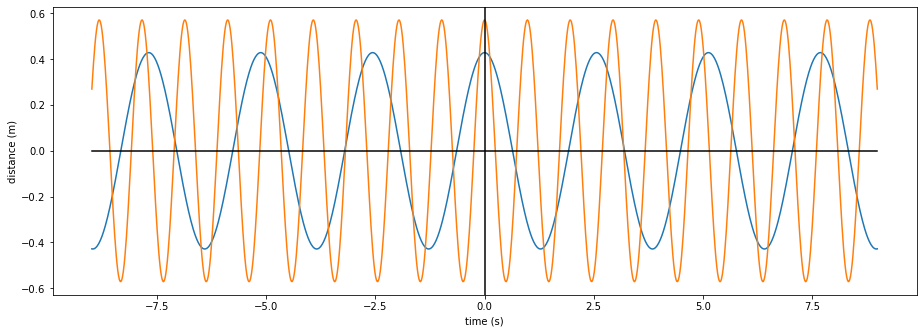

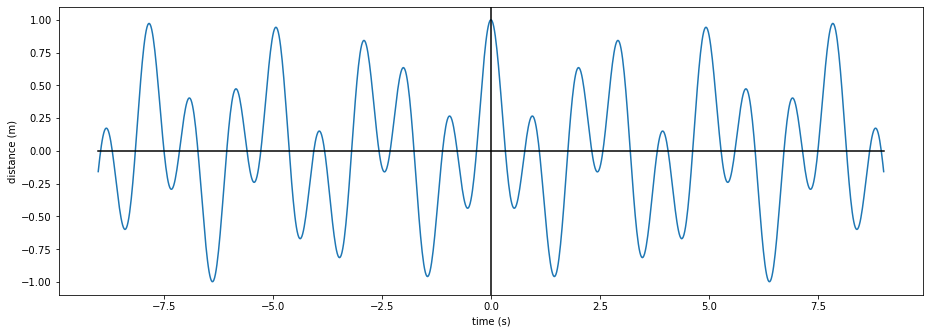

A[0] = 0.286
w[0] = 6.000

A[1] = -1.286
w[1] = 41.000

mass 2


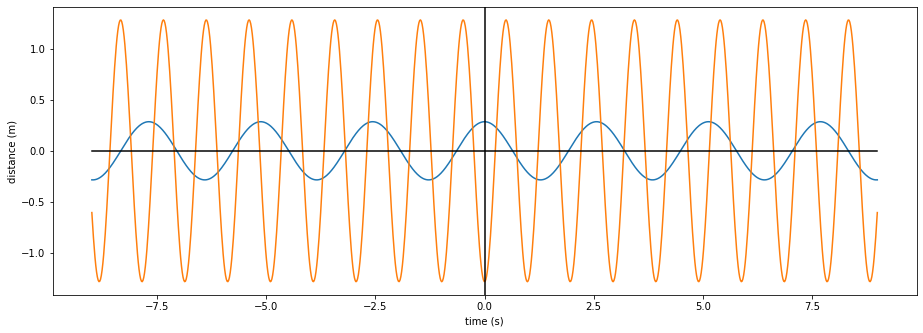

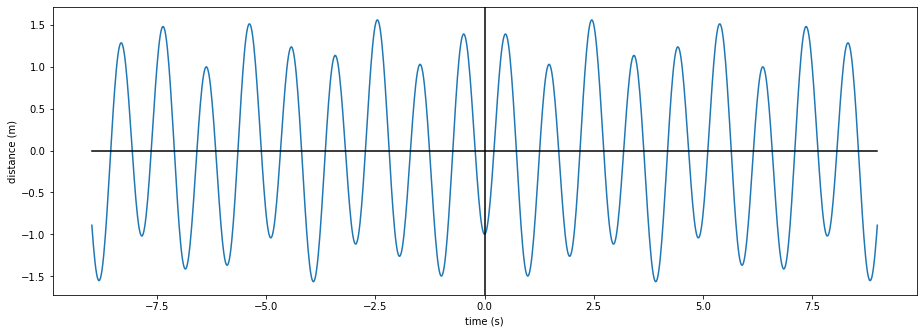

In [25]:
#forewarning this code is very confusing and difficult to describe since I figured most of it out with trial and error, I'm sorry



#by combining this with the code I've written we can write a program that both 
#solves the eom and plots the results of the superposition for a one dimensional coupled oscillator problem
#it will take the K and M matrix and the starting position of each mass
#and it should take all the optional arguments that combine() has so we can customize or graph and points
def solve(K, M, Hilbert, points = 1000, length = 24, graph_length = 2, graph_height = 1, constant = 0):
    #get M inverse
    M_inv = LA.inv(M)
    
    #multiply M_inv and K to get the eom_mat
    eom_mat = np.matmul(M_inv,K)
    
    #get the eigen values and vectors
    w,v = LA.eig(eom_mat)
    
    #fix the dumb v output
    new_v = fix_v(v)
    print("eigenvalues =",w)
    print("eigenvectors =",new_v)
    print("\n\n")
    
    #initiliaze a list to store the amplitudes of the normal modes
    lst = []
    #taking the inverse of the matrix of eigen vectors times the Mass matrix will give the coefficients for the normal modes
    inv = LA.inv(np.matmul(new_v,M))
    
    #this gives us the coefficients for the normal modes when rearranged for x1, x2 etc. 
    for i in range(len(Hilbert)):
        lst.append(np.matmul(np.matmul(new_v[i],M),Hilbert))
    
    #now we have all the information we need to plot the equation
    for i in range(len(w)):
        plt_ans = eom()
        for j in range(len(v[i])):
            A = lst[j]*inv[i][j]
            print(f"A[{j}] = {A:.3f}")
            print(f"w[{j}] = {w[j]:.3f}\n")
            plt_ans.add_line(A,np.sqrt(w[j]),np.pi/2)
#         we want to plot these normal modes seperately so we do it here in the loop
#         as well as resetting the data type
#         so call the combine function and then delete plt_ans
        print("mass",i+1)
        combine(plt_ans,points = points,length = length, graph_length = graph_length, graph_height = graph_height, constant = 0)
        del plt_ans


#useful note: an identity matrix of nxn can be made with np.identity(n)
#this is the graph of homework assignment 7 question 1 assumin K_0 = 1 and M_0 = 1 
K = np.array([[7,-6],[-6,11]])
M = np.array([[1/2,0],[0,1/3]])
Hilbert = [1,-1]


solve(K,M,Hilbert, length = 9)


eigenvalues = [3.61803399 2.61803399 0.38196601 1.38196601]
eigenvectors = [[-0.3717480344601838, 0.6015009550075453, -0.6015009550075462, 0.37174803446018484], [-0.6015009550075456, 0.37174803446018523, 0.3717480344601839, -0.6015009550075456], [-0.37174803446018456, -0.6015009550075456, -0.6015009550075456, -0.37174803446018456], [-0.6015009550075457, -0.3717480344601843, 0.3717480344601846, 0.6015009550075455]]



A[0] = -0.000
w[0] = 3.618

A[1] = 1.000
w[1] = 2.618

A[2] = 0.000
w[2] = 0.382

A[3] = 0.000
w[3] = 1.382

mass 1


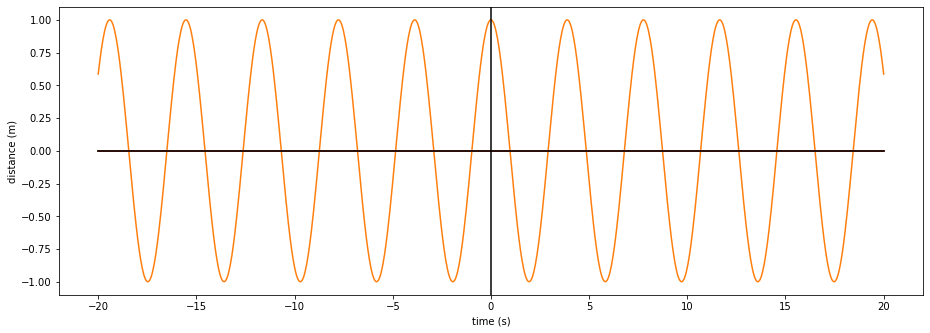

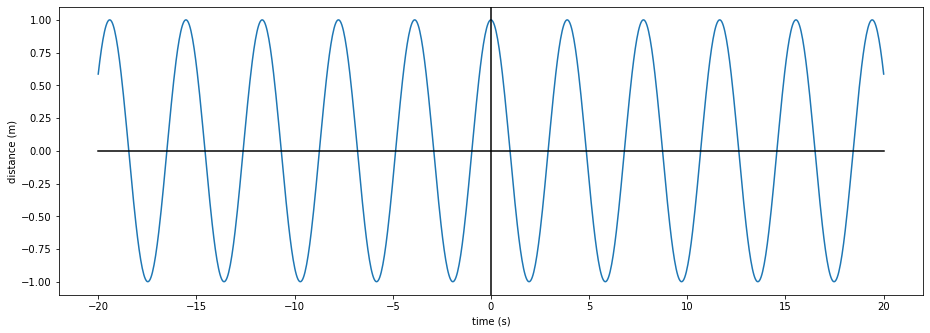

A[0] = 0.000
w[0] = 3.618

A[1] = -0.618
w[1] = 2.618

A[2] = 0.000
w[2] = 0.382

A[3] = 0.000
w[3] = 1.382

mass 2


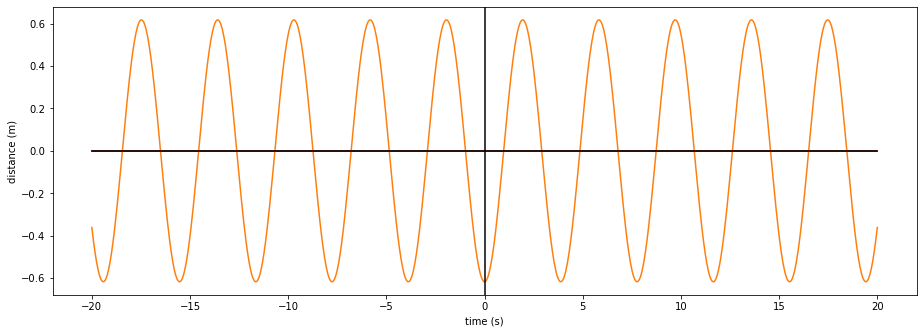

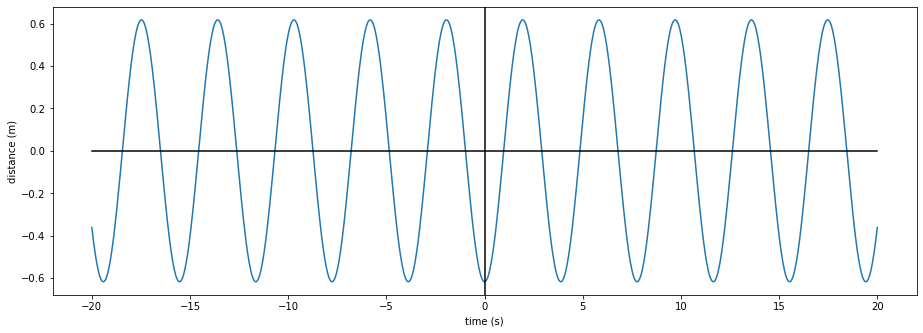

A[0] = -0.000
w[0] = 3.618

A[1] = -0.618
w[1] = 2.618

A[2] = 0.000
w[2] = 0.382

A[3] = -0.000
w[3] = 1.382

mass 3


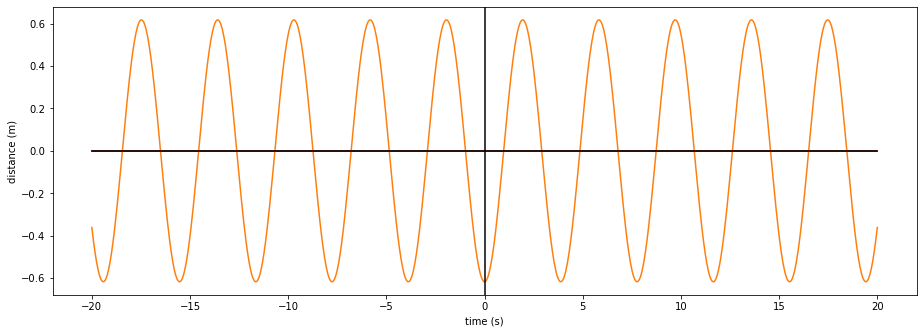

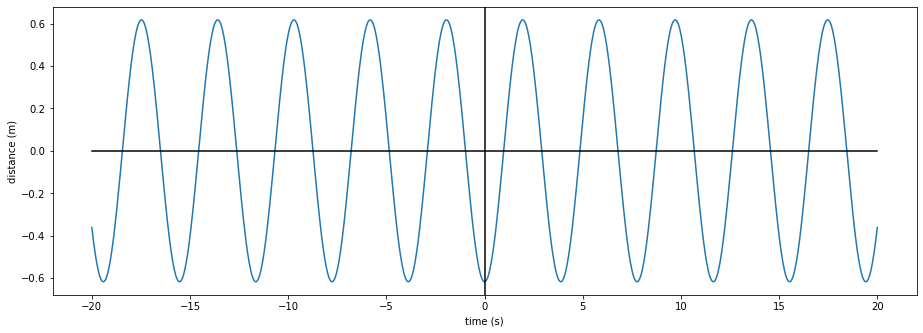

A[0] = 0.000
w[0] = 3.618

A[1] = 1.000
w[1] = 2.618

A[2] = 0.000
w[2] = 0.382

A[3] = -0.000
w[3] = 1.382

mass 4


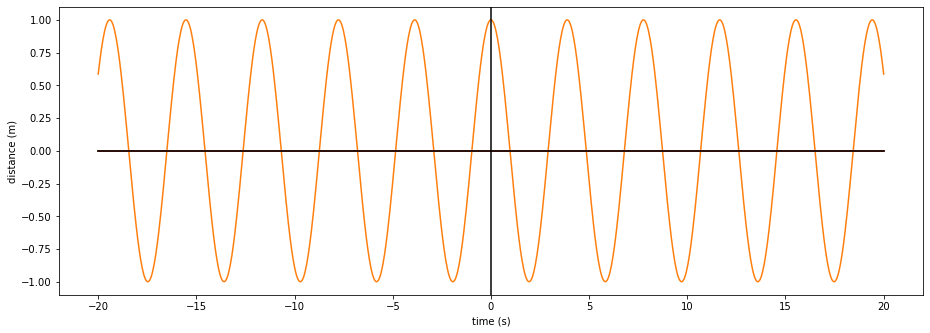

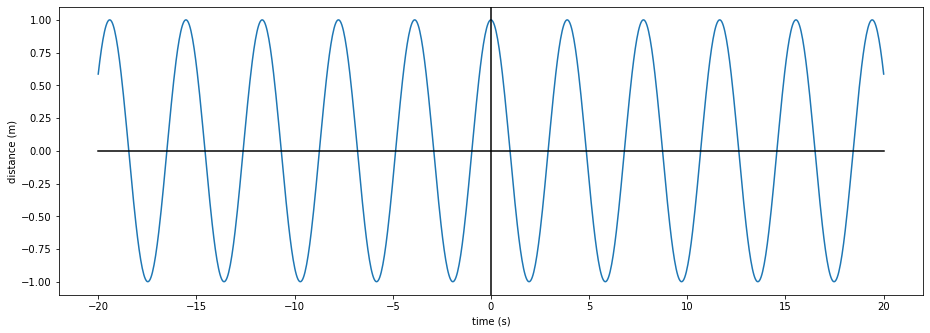

In [30]:
#now to further test our function lets try plugging in the normal mode position that we solved for
#this should result in all the functions having the same frequency 

K = np.array([[2,-1,0,0],[-1,2,-1,0],[0,-1,2,-1],[0,0,-1,2]])
M = np.identity(4)
Hilbert = [1,(-np.sqrt(5)+1)/2,(-np.sqrt(5)+1)/2,1]

solve(K,M,Hilbert, length = 20)

Mission success.